In [3]:
import pandas as pd
import numpy as np

import re
import string
import os

import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

plt.style.use('ggplot')

In [4]:
tweet = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/twitter-disaster-prediction-dataset/master/train.csv')

In [5]:
tweet.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
tweet.shape

(7613, 5)

In [7]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 120

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Real or not real disaster tweet')

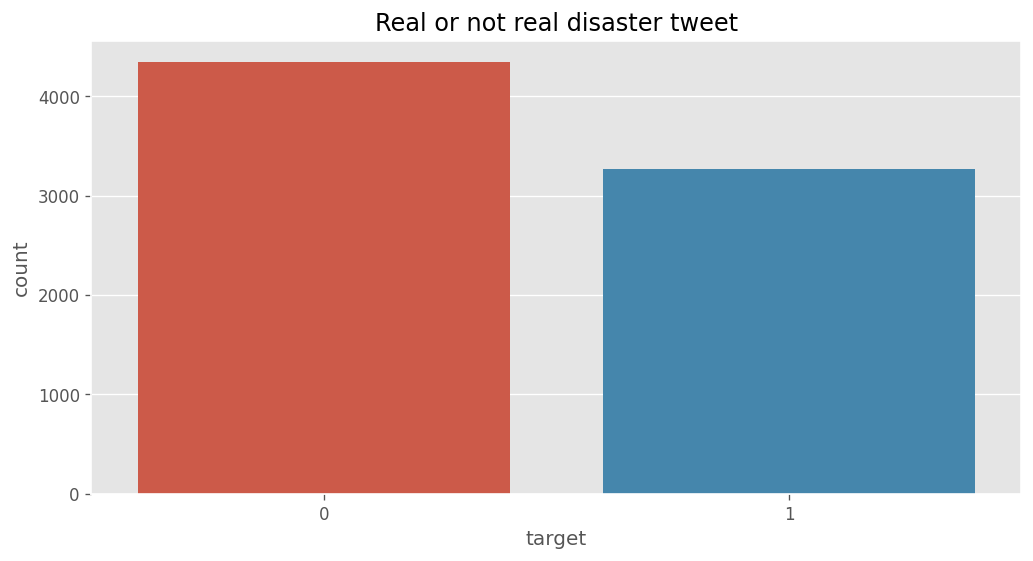

In [9]:
sns.countplot('target', data=tweet)
plt.title('Real or not real disaster tweet')

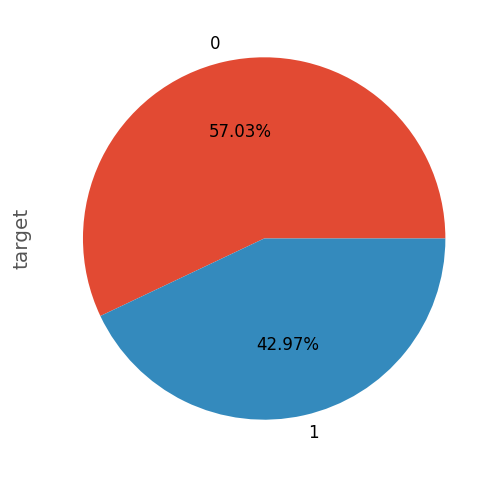

In [10]:
tweet['target'].value_counts().plot.pie(autopct = '%1.2f%%')

In [8]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-5qb3k9s2
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-5qb3k9s2
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-cp36-none-any.whl size=11742 sha256=aaabbe14a87a1ec9ca683deaab9ce4dde01d1630515325e2aed1128ff20885a7
  Stored in directory: /tmp/pip-ephem-wheel-cache-cfbgqe45/wheels/a8/18/22/90afa4bd43247fb9a75b710a4a3fcd94966c022ce9e3c7d0a6
Successfully built preprocess-kgptalkie
  Found existing installation: preprocess-kgptalkie 0.1.3
    Uninstalling preprocess-kgptalkie-0.1.3:
      Successfully uninstalled preprocess-kgptalkie-0.1.3


In [9]:
import preprocess_kgptalkie as kgp

In [10]:
tweet  = kgp.get_basic_features(tweet)

In [11]:
tweet.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,57,13,4.384615,6,1,0,0,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,32,7,4.571429,0,0,0,1,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,112,22,5.090909,9,0,0,1,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,57,8,7.125000,1,1,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,72,16,4.500000,6,2,0,0,0


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


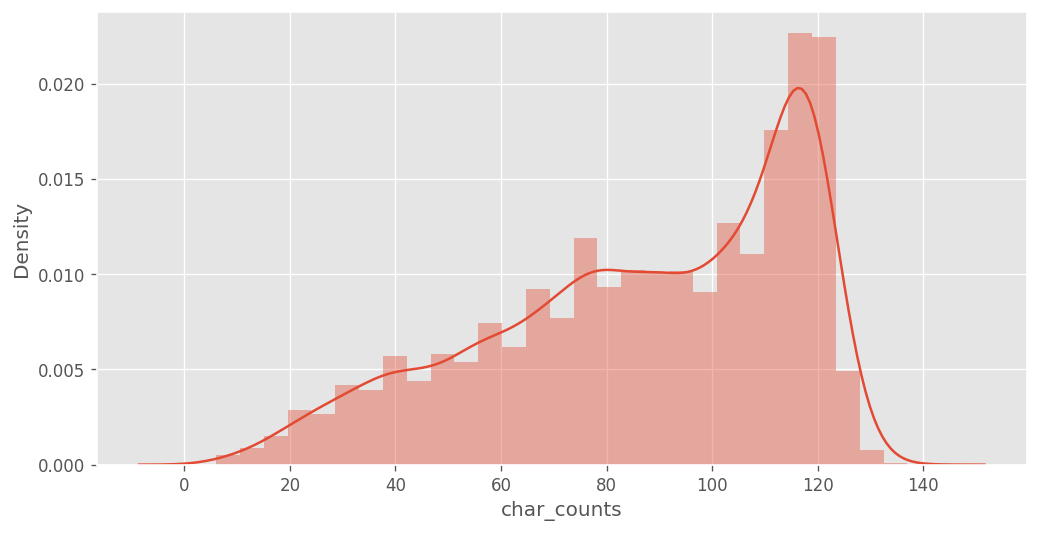

In [16]:
sns.distplot(tweet['char_counts'])

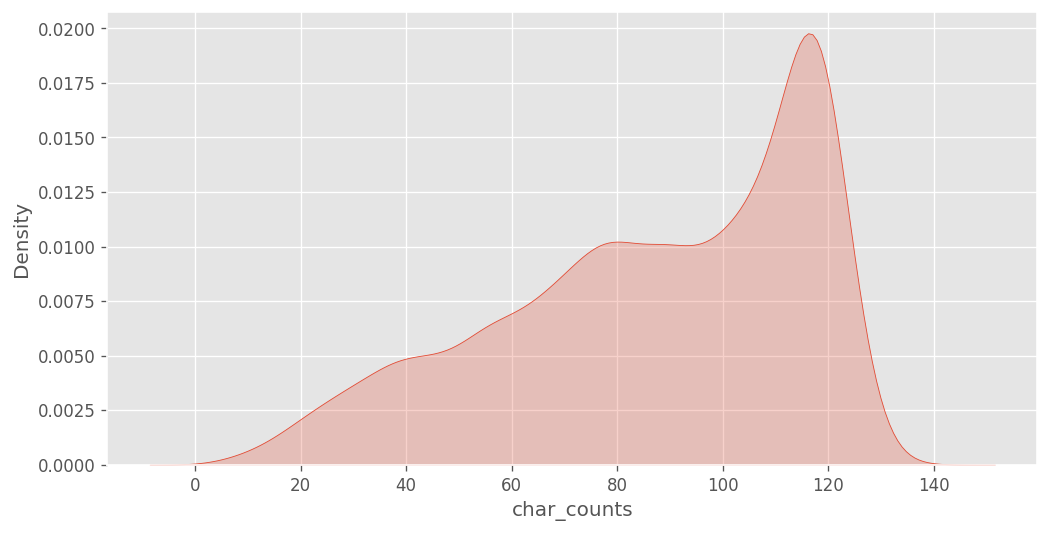

In [18]:
sns.kdeplot(tweet['char_counts'], shade=True)

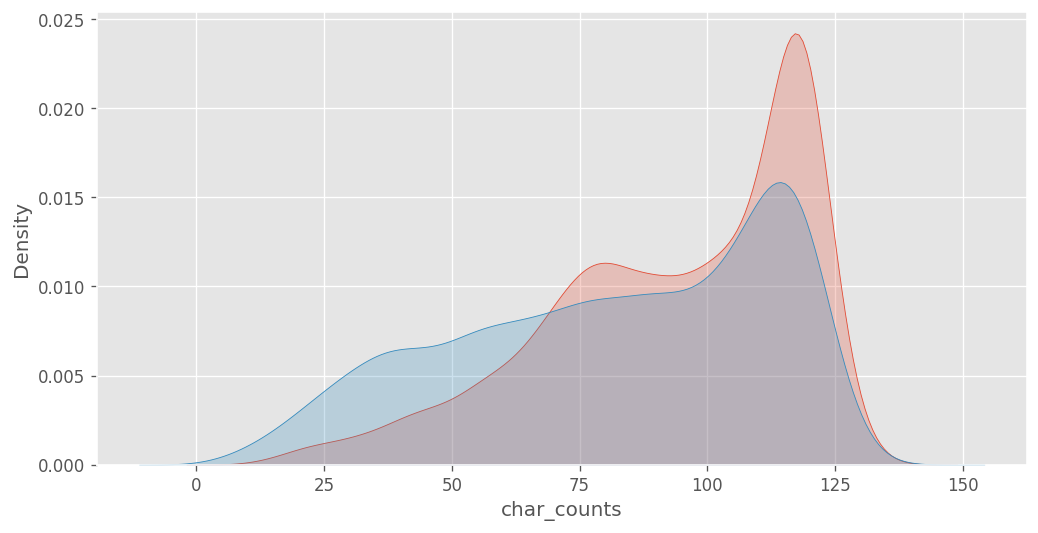

In [21]:
sns.kdeplot(tweet[tweet['target']==1]['char_counts'], shade=True)
sns.kdeplot(tweet[tweet['target']==0]['char_counts'], shade=True)

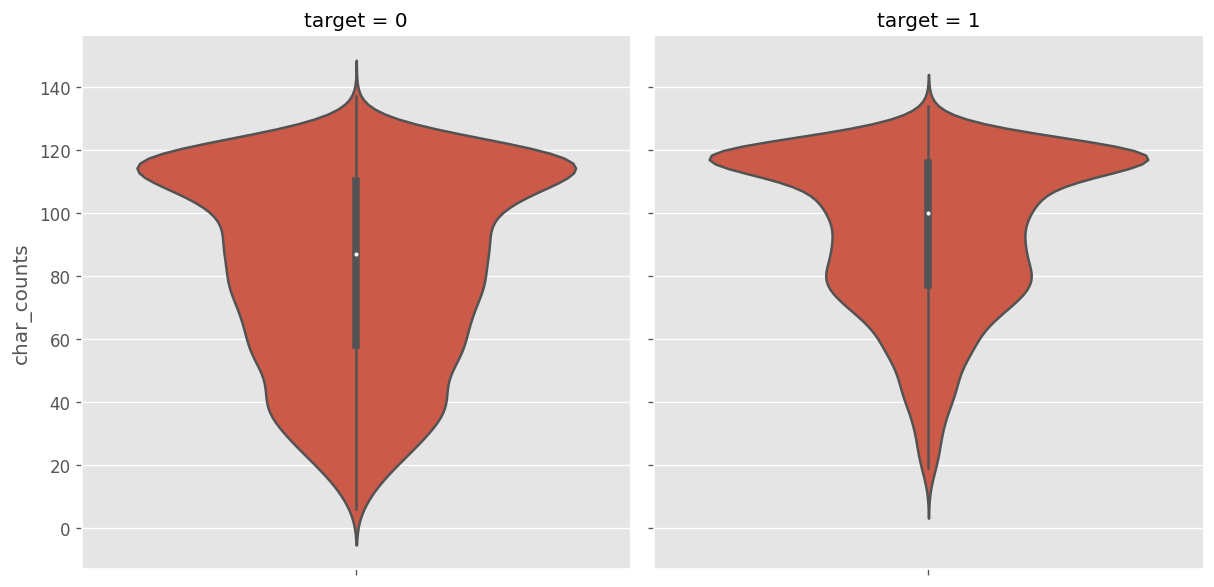

In [22]:
sns.catplot(y='char_counts', data=tweet, kind='violin', col='target')

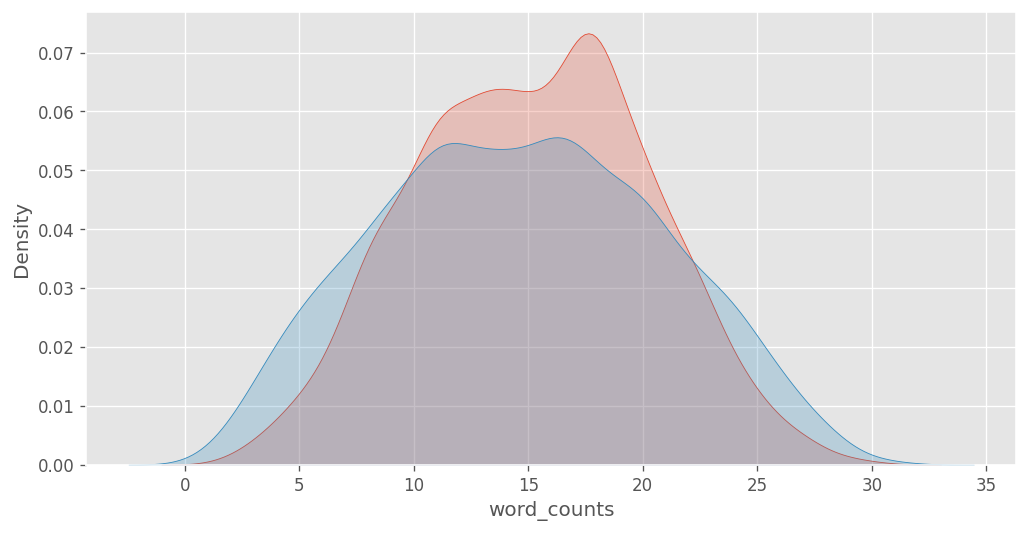

In [23]:
sns.kdeplot(tweet[tweet['target']==1]['word_counts'], shade=True)
sns.kdeplot(tweet[tweet['target']==0]['word_counts'], shade=True)

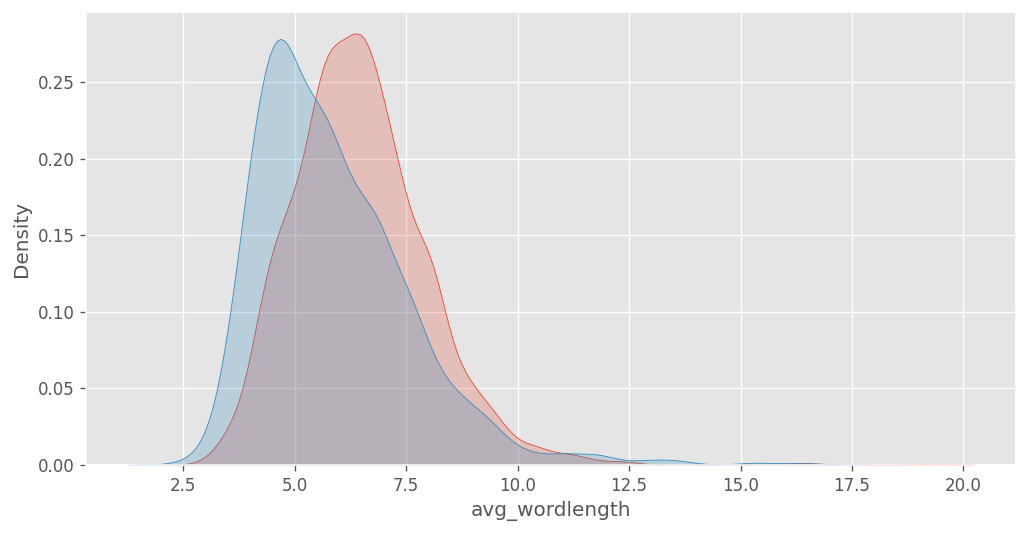

In [25]:
sns.kdeplot(tweet[tweet['target']==1]['avg_wordlength'], shade=True)
sns.kdeplot(tweet[tweet['target']==0]['avg_wordlength'], shade=True)

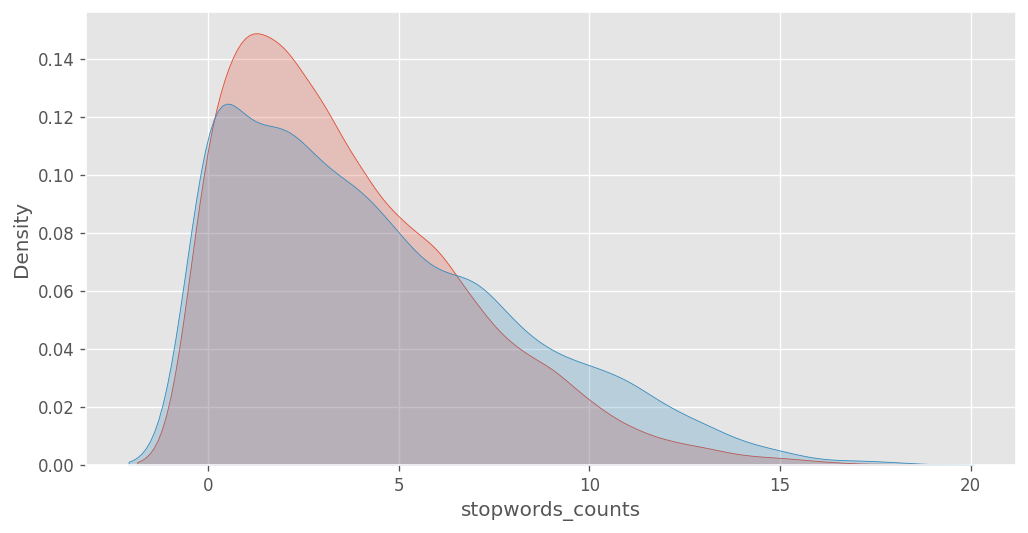

In [26]:
sns.kdeplot(tweet[tweet['target']==1]['stopwords_counts'], shade=True)
sns.kdeplot(tweet[tweet['target']==0]['stopwords_counts'], shade=True)

In [28]:
freqs = kgp.get_word_freqs(tweet, 'text')

<BarContainer object of 20 artists>

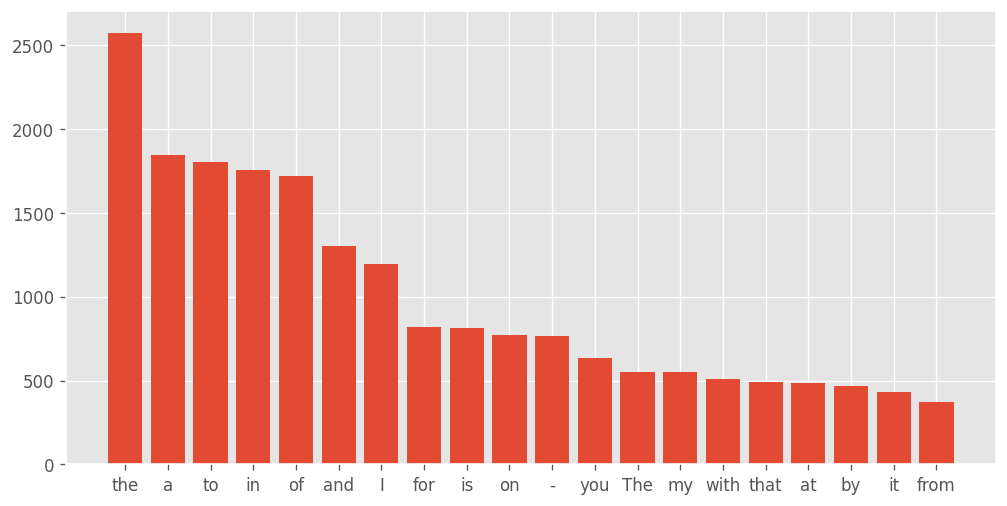

In [29]:
top20 = freqs[:20]
plt.bar(top20.index, top20.values)

In [30]:
least20 = freqs[-20:]
least20

Violation                 1
todayI'm                  1
(buildings                1
http://t.co/2OroYUNYM2    1
ÛÏLove                   1
grants                    1
@DoningtonDash            1
@PattyDs50                1
GEARS                     1
w/another                 1
http://t.co/BMxsndx14g    1
offers                    1
marquez                   1
Knox                      1
sad.'                     1
@tomarse99                1
Latina)                   1
#WE                       1
healed!!!                 1
person...                 1
dtype: int64

In [33]:
bigram = kgp.get_ngram(tweet, 'text', ngram_range=2)
bigram[:5]

[('ûówe work', 68495),
 ('ûótech business', 68494),
 ('ûónegligence and', 68493),
 ('ûókody vine', 68492),
 ('ûóher upper', 68491)]

In [12]:
def get_clean(x):
    x = str(x).lower().replace('\\', '').replace('_', ' ').replace('.',' ')
    x = kgp.cont_exp(x)
    x = kgp.remove_emails(x)
    x = kgp.remove_urls(x)
    x = kgp.remove_html_tags(x)
    x = kgp.remove_rt(x)
    x = kgp.remove_accented_chars(x)
    x = kgp.remove_special_chars(x)
    x = kgp.remove_dups_char(x)
    return x

In [13]:
tweet['text'] = tweet['text'].apply(lambda x:get_clean(x))

In [14]:
tweet.head()['text']

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    130 people receive wildfires evacuation orders...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

In [17]:
real = kgp.get_word_freqs(tweet[tweet['target']==1], 'text')
real = ' '.join(real.index)
real

'httpt the in of a to and is on for i at by from it that with not you after this fire are was as have my news httpst over up more via an disaster were be people california suicide has no police who when but been like killed do 2 will just hiroshima than so out fires storm crash families we train about now into s emergency your buildings bomb all there two what mh370 attack am nuclear they video wildfire accident get bombing new one minister prime burning how northern dead legionnaires me bomber homes if some war car atomic still obama he fatal years off collapse forest may us debris retweet city watch japan malaysia 1 today first or latest mass man severe water near had before those earthquake confirmed oil found would army spill floods world 70 down under home warning evacuation wreckage injured 3 weather outbreak could derailment 4 being migrants 40 saudi thunderstorm our old flood can during say investigators flooding missing time their bridge state death her mosque back suspect isl

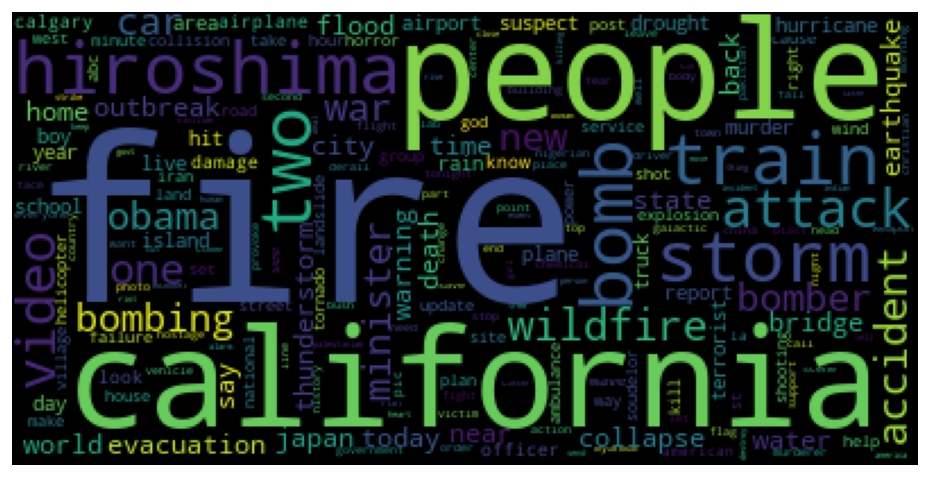

In [41]:
word_cloud = WordCloud(max_font_size=100).generate(real)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [43]:
non_real = kgp.get_word_freqs(tweet[tweet['target']==0], 'text')
non_real = ' '.join(non_real.index)
non_real

'the httpt i a to and of is in you my it for not on that with this have be am httpst are do me out your like so by at just was but will up all he if from new as get they has we or no when now about what would an how one can there body people 2 via her been his video into more loud us know love back time why got off emergency them full see after who day 3 youtube cannot going did still fire some good let go she laughing want think had man our should ass over retweet world then way life their youre first work last burning too only make really need news than because god here even being much best many take content could help were say wreck 5 him right black great its feel today please hot every 4 fucking never im look down 1 cross fear bags read before ever night does top oh fuck come reddit these without bag everyone getting any another year ruin shit liked panic may head screaming bloody death smoke bad always wrecked u most buildings disaster face explode coming crash well school harm w

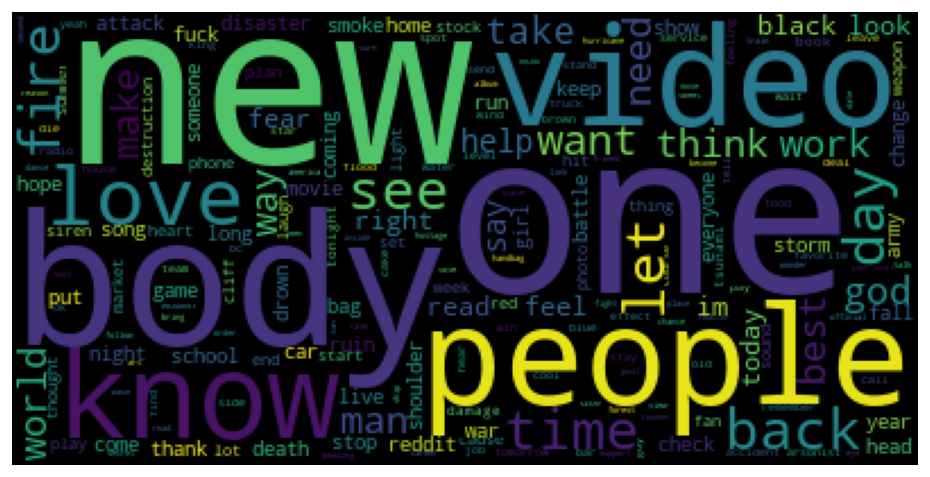

In [44]:
word_cloud = WordCloud(max_font_size=100).generate(non_real)
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [18]:
text = tweet['text']
y = tweet['target']

In [46]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(text)

In [47]:
X.shape

(7613, 22546)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0, stratify=y)

In [53]:
def run_SVM(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Classification report')
    print(classification_report(y_test, y_pred))

In [54]:
from sklearn.svm import LinearSVC

In [56]:
clf = LinearSVC()
run_SVM(clf, X_tarin, X_test, y_train, y_test)

Classification report
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       869
           1       0.83      0.69      0.75       654

    accuracy                           0.81      1523
   macro avg       0.81      0.79      0.80      1523
weighted avg       0.81      0.81      0.80      1523



In [59]:
!python -m spacy download en_core_web_lg

     |████████████████████████████████| 827.9MB 1.2MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-cp36-none-any.whl size=829180945 sha256=e1a261e784f8cf53430b3231fd7156b8bce872da762feaf6a551b55e863c0044
  Stored in directory: /tmp/pip-ephem-wheel-cache-kcqma8y7/wheels/2a/c1/a6/fc7a877b1efca9bc6a089d6f506f16d3868408f9ff89f8dbfc
Successfully built en-core-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [60]:
import spacy
import en_core_web_lg

In [61]:
nlp = en_core_web_lg.load()

In [62]:
def get_vec(x):
    doc = nlp(x)
    vec = doc.vector
    return vec

In [63]:
tweet['vec'] = tweet['text'].apply(lambda x:get_vec(x))

In [64]:
tweet.head()

,id,keyword,location,text,target,char_counts,word_counts,avg_wordlength,stopwords_counts,hashtag_counts,mentions_counts,digits_counts,uppercase_counts,vec
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1,57,13,4.384615,6,1,0,0,1,"[-0.26623327, 0.05843069, -0.1404636, -0.05265..."
1,4,NaN,NaN,forest fire near la ronge sask canada,1,32,7,4.571429,0,0,0,1,0,"[-0.014817425, -0.09212343, -0.10716944, -0.33..."
2,5,NaN,NaN,all residents asked to shelter in place are be...,1,112,22,5.090909,9,0,0,1,0,"[0.0059339865, 0.016337818, -0.105279535, -0.0..."
3,6,NaN,NaN,130 people receive wildfires evacuation orders...,1,57,8,7.125000,1,1,0,1,0,"[-0.13400537, 0.25267026, 0.09032763, -0.16645..."
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1,72,16,4.500000,6,2,0,0,0,"[-0.06394094, -0.01423019, 0.0063574947, 0.071..."


In [66]:
X = tweet['vec'].to_numpy()
X = X.reshape(-1, 1)
X.shape

(7613, 1)

In [67]:
X = np.concatenate(np.concatenate(X, axis=0), axis=0).reshape(-1, 300)

In [68]:
X.shape

(7613, 300)

In [69]:
y = tweet['target']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0, stratify=y)

In [71]:
clf = LinearSVC()
run_SVM(clf, X_train, X_test, y_train, y_test)

Classification report
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       869
           1       0.81      0.71      0.76       654

    accuracy                           0.80      1523
   macro avg       0.80      0.79      0.79      1523
weighted avg       0.80      0.80      0.80      1523



In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam

In [19]:
token = Tokenizer()
token.fit_on_texts(text)

In [20]:
vocab_size = len(token.word_index)+1
vocab_size

22582

In [21]:
encoded_text = token.texts_to_sequences(text)
encoded_text

[[109, 4491, 22, 2, 868, 6, 20, 246, 129, 1681, 4492, 74, 41],
 [186, 43, 223, 763, 6792, 6793, 1328],
 [41,
  1682,
  1435,
  5,
  2062,
  4,
  655,
  22,
  125,
  6794,
  19,
  1683,
  42,
  438,
  253,
  58,
  2062,
  4,
  655,
  1329,
  22,
  1054],
 [2809, 56, 4493, 1330, 253, 1329, 4, 86],
 [36, 93, 1159, 20, 314, 23, 6795, 2063, 29, 261, 23, 1330, 6796, 68, 3, 189],
 [2810,
  391,
  86,
  1554,
  793,
  829,
  4,
  637,
  6797,
  534,
  5,
  1106,
  371,
  43,
  4494,
  1330],
 [224, 73, 830, 282, 1160, 831, 247, 6, 1862, 4, 6798, 999, 2344, 1555],
 [7, 31, 12, 225, 6, 2, 1863, 8, 7, 71, 103, 3, 43, 4, 2, 4495],
 [62, 9, 44, 72, 253, 1237, 52, 4, 2, 585, 832, 2, 703],
 [7, 31, 2345, 16, 2, 489, 9, 240, 5, 109, 354],
 [586, 56, 611, 23, 2, 283, 467, 32, 612],
 [833,
  613,
  2811,
  9,
  217,
  2812,
  3467,
  656,
  3,
  657,
  7,
  199,
  4,
  613,
  2811,
  57,
  31,
  7,
  301,
  27,
  57,
  31,
  7,
  301,
  27,
  6799,
  247],
 [2813, 247, 2064, 6800, 2811, 1436, 58, 1864, 

In [22]:
max_len = 40
X = pad_sequences(encoded_text, maxlen=max_len, padding='post')

In [23]:
X.shape

(7613, 40)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0, stratify=y)

In [26]:
vec_size = 100
model = Sequential()
model.add(Embedding(vocab_size, vec_size, input_length=max_len))
model.add(Conv1D(32, 2, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 100)           2258200   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 39, 32)            6432      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 19, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 19, 32)            0         
_________________________________________________________________
dense (Dense)                (None, 19, 32)            1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 19, 32)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 19, 16)           

In [28]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
191/191 [==============================] - 12s 24ms/step - loss: 0.6880 - accuracy: 0.5416 - val_loss: 0.6598 - val_accuracy: 0.6001
Epoch 2/5
191/191 [==============================] - 4s 22ms/step - loss: 0.5774 - accuracy: 0.7127 - val_loss: 0.4728 - val_accuracy: 0.7991
Epoch 3/5
191/191 [==============================] - 4s 22ms/step - loss: 0.3490 - accuracy: 0.8638 - val_loss: 0.4500 - val_accuracy: 0.7932
Epoch 4/5
191/191 [==============================] - 4s 22ms/step - loss: 0.2067 - accuracy: 0.9235 - val_loss: 0.4894 - val_accuracy: 0.7748
Epoch 5/5
191/191 [==============================] - 4s 22ms/step - loss: 0.1159 - accuracy: 0.9596 - val_loss: 0.5672 - val_accuracy: 0.7630


In [29]:
!pip install ktrain

     |████████████████████████████████| 25.3MB 136kB/s 
     |████████████████████████████████| 6.8MB 33.7MB/s 
     |████████████████████████████████| 983kB 50.8MB/s 
     |████████████████████████████████| 266kB 60.2MB/s 
     |████████████████████████████████| 1.3MB 46.9MB/s 
     |████████████████████████████████| 1.1MB 49.5MB/s 
     |████████████████████████████████| 471kB 53.5MB/s 
     |████████████████████████████████| 2.9MB 52.3MB/s 
     |████████████████████████████████| 890kB 39.5MB/s 
  Created wheel for ktrain: filename=ktrain-0.25.3-cp36-none-any.whl size=25276312 sha256=16ab965b73682fe97b21e12a876dd0e14fdd1ec13e5d319e4dcb5b5713b5c479
  Stored in directory: /root/.cache/pip/wheels/86/cd/9c/ad53b98a3eccf4ddeddccfce99d353781f206a1ac4287ca721
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993194 sha256=ec5b629b393ee4986f747cfc3c66229f0ef2ad90616ac1c57e0afe53855b4306
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d4

In [1]:
import ktrain
from ktrain import text

In [15]:
(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(train_df=tweet, text_column='text', label_columns='target', maxlen=40, preprocess_mode='bert')

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [16]:
model = text.text_classifier(name = 'bert', train_data=(X_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 40
done.


In [17]:
learner = ktrain.get_learner(model=model, train_data=(X_train, y_train), val_data = (X_test, y_test), batch_size=64)

In [19]:
learner.fit_onecycle(lr=2e-5, epochs=10)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
108/108 [==============================] - 78s 725ms/step - loss: 0.3594 - accuracy: 0.8562 - val_loss: 0.4121 - val_accuracy: 0.8150
Epoch 2/10
108/108 [==============================] - 80s 742ms/step - loss: 0.3398 - accuracy: 0.8640 - val_loss: 0.4493 - val_accuracy: 0.8071
Epoch 3/10
108/108 [==============================] - 81s 749ms/step - loss: 0.3060 - accuracy: 0.8816 - val_loss: 0.4354 - val_accuracy: 0.8241
Epoch 4/10
108/108 [==============================] - 81s 751ms/step - loss: 0.2533 - accuracy: 0.9076 - val_loss: 0.5008 - val_accuracy: 0.8097
Epoch 5/10
108/108 [==============================] - 81s 753ms/step - loss: 0.1971 - accuracy: 0.9304 - val_loss: 0.5552 - val_accuracy: 0.8018
Epoch 6/10
108/108 [==============================] - 81s 751ms/step - loss: 0.2036 - accuracy: 0.9231 - val_loss: 0.5816 - val_accuracy: 0.8018
Epoch 7/10
108/108 [==============================] - 81s 751ms/ste

In [20]:
predictor = ktrain.get_predictor(learner.model, preproc)
data = ['I met you today by accident', 'I got today car accident, I am injured']
predictor.predict(data, return_proba=True)

/usr/local/lib/python3.6/dist-packages/ktrain/text/preprocessor.py:216: UserWarning: List or array of two texts supplied, so task being treated as text classification. If this is a sentence pair classification task, please cast to tuple.
  'If this is a sentence pair classification task, please cast to tuple.')


array([[0.9932681 , 0.00673196],
       [0.0077864 , 0.99221355]], dtype=float32)